<a href="https://colab.research.google.com/github/ronykris/stock_prediction_api/blob/master/stock_prediction_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
from datetime import datetime, timedelta
import yfinance as yf
from prophet import Prophet
import pandas as pd

In [29]:
model = Prophet(daily_seasonality = True)

In [30]:
def train_model(ticker):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=1825)
    df = yf.download(ticker, start=start_date, end=end_date)
    print(df)
    df_prophet = df.reset_index()[["Date", "Close"]]
    df_prophet.columns = ["ds", "y"]
    print(df_prophet)
    model.fit(df_prophet)

In [31]:
train_model('META')

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpskuwr502/po4oej67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpskuwr502/3011d93c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18453', 'data', 'file=/tmp/tmpskuwr502/po4oej67.json', 'init=/tmp/tmpskuwr502/3011d93c.json', 'output', 'file=/tmp/tmpskuwr502/prophet_modelump1mrfo/prophet_model-20240825130055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:00:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-08-27  181.929993  184.039993  181.009995  181.300003  180.928207   
2019-08-28  180.529999  181.949997  178.919998  181.759995  181.387253   
2019-08-29  183.770004  186.080002  183.470001  185.570007  185.189453   
2019-08-30  186.779999  186.800003  183.460007  185.669998  185.289246   
2019-09-03  184.000000  185.669998  182.110001  182.389999  182.015976   
...                ...         ...         ...         ...         ...   
2024-08-19  526.869995  531.659973  522.760010  529.280029  529.280029   
2024-08-20  528.349976  531.090027  525.880005  526.729980  526.729980   
2024-08-21  527.150024  539.400024  526.929993  535.159973  535.159973   
2024-08-22  537.000000  544.229980  528.590027  531.929993  531.929993   
2024-08-23  536.919983  539.869995  525.059998  528.000000  528.000000   

              Volume  
Date          

13:00:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
def predict(days):
  future = model.make_future_dataframe(periods=days)
  forecast = model.predict(future)
  current_date = pd.Timestamp(datetime.now().date())
  future_forecast = forecast[forecast['ds'] > current_date]
  results = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_dict('records')
  ##for result in results:
  ##      result['ds'] = result['ds'].strftime('%Y-%m-%d')
  ##return results
  results_df = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].reset_index(drop=True)
  results_df['ds'] = results_df['ds'].dt.strftime('%Y-%m-%d')
  #results_df['ds'] = pd.to_datetime(results_df['ds'])
  return results_df

In [49]:
forecast_df = predict(365)
print(forecast_df)


             ds        yhat  yhat_lower  yhat_upper
0    2024-08-26  557.983007  530.060951  584.918139
1    2024-08-27  558.543753  528.582952  588.202732
2    2024-08-28  559.587756  530.956215  588.448617
3    2024-08-29  560.370704  532.738378  589.971960
4    2024-08-30  561.274217  534.157748  590.621860
..          ...         ...         ...         ...
358  2025-08-19  788.049760  691.278616  878.063829
359  2025-08-20  789.441300  696.488487  877.801612
360  2025-08-21  790.654471  698.573406  884.305378
361  2025-08-22  792.070197  691.444034  882.785036
362  2025-08-23  792.023299  694.883094  881.133181

[363 rows x 4 columns]


In [34]:
forecast_df.head()

,ds,yhat,yhat_lower,yhat_upper
0,2024-08-26,557.983007,529.776076,585.333860
1,2024-08-27,558.543753,528.390301,584.074250
2,2024-08-28,559.587756,531.856013,586.851734
3,2024-08-29,560.370704,532.516433,589.417948
4,2024-08-30,561.274217,531.960782,590.993504


In [35]:
forecast_df.describe()

,ds,yhat,yhat_lower,yhat_upper
count,363,363.000000,363.000000,363.000000
mean,2025-02-23 00:00:00,660.586024,609.084973,710.327635
min,2024-08-26 00:00:00,554.703708,524.059568,582.857271
25%,2024-11-24 12:00:00,594.786114,562.630523,625.939552
50%,2025-02-23 00:00:00,656.241082,612.487925,697.904609
75%,2025-05-24 12:00:00,726.463293,657.442402,793.011460
max,2025-08-23 00:00:00,792.070197,693.521734,891.860180
std,NaN,72.671792,51.957835,92.582682


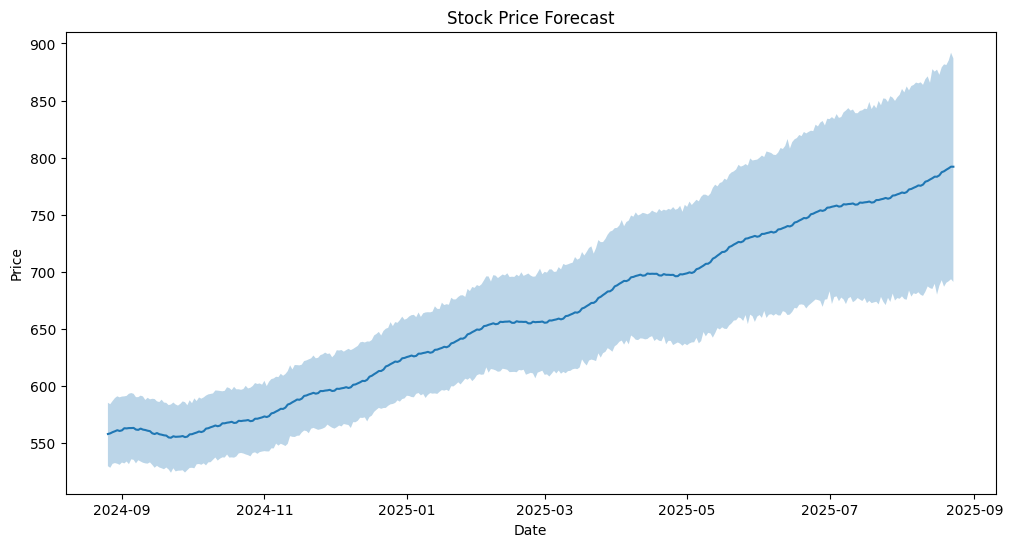

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(forecast_df['ds'], forecast_df['yhat'])
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], alpha=0.3)
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [38]:
!pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00


In [50]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()

class InputData(BaseModel):
  days: int

class PredictionOutput(BaseModel):
  ds: str
  yhat: float
  yhat_lower: float
  yhat_upper: float

@app.post('/predict', response_model=list[PredictionOutput])
async def get_prediction(data: InputData):
    results = predict(data.days)
    return results.to_dict('records')


In [42]:
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [51]:
import threading
import uvicorn

def run_fastapi():
    uvicorn.run(app, host="127.0.0.1", port=8000)

# Run the FastAPI app in a separate thread
threading.Thread(target=run_fastapi, daemon=True).start()

print("FastAPI application is running...")
!npx localtunnel --port 8000

FastAPI application is running...


INFO:     Started server process [223]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('127.0.0.1', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


your url is: https://sixty-experts-repeat.loca.lt
INFO:     34.150.252.92:0 - "POST /predict HTTP/1.1" 200 OK
^C


In [44]:
!npx localtunnel --port 8000

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://every-moons-visit.loca.lt
^C


KeyboardInterrupt: 